<a href="https://colab.research.google.com/github/princevalerie/all_project/blob/main/ve_bcg_x_churn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

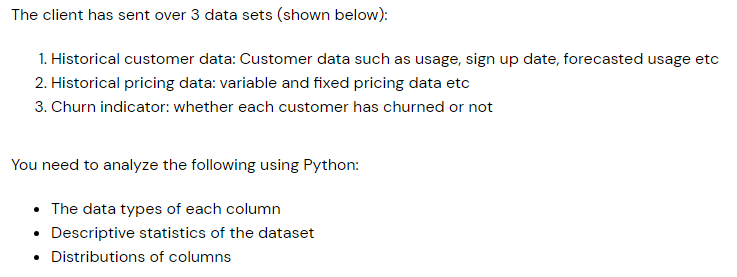

Dataset Description : [CLICK HERE](https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1692817692978/Data%20Description%20(1).pdf)

**Task 2**

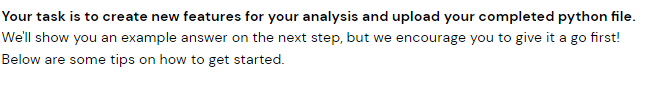


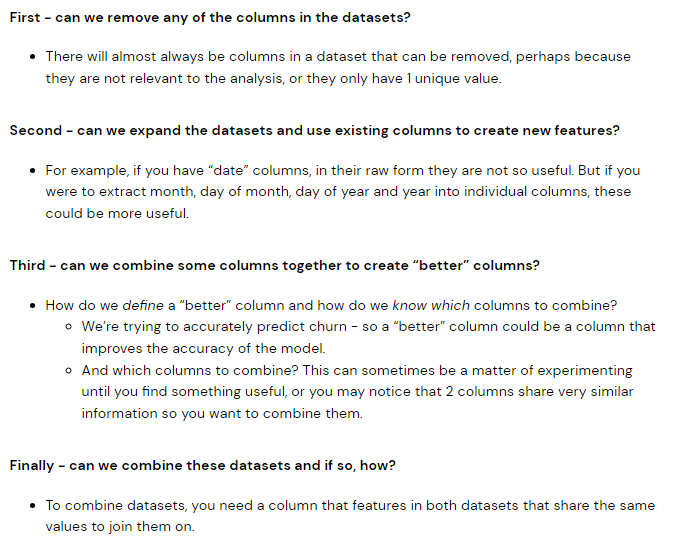

**Task 3**

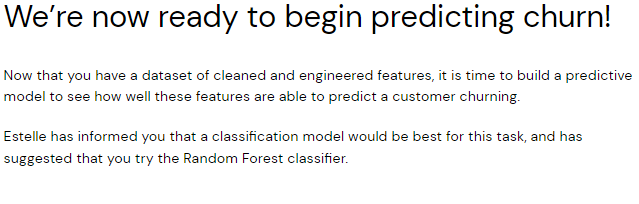

**Task 4**

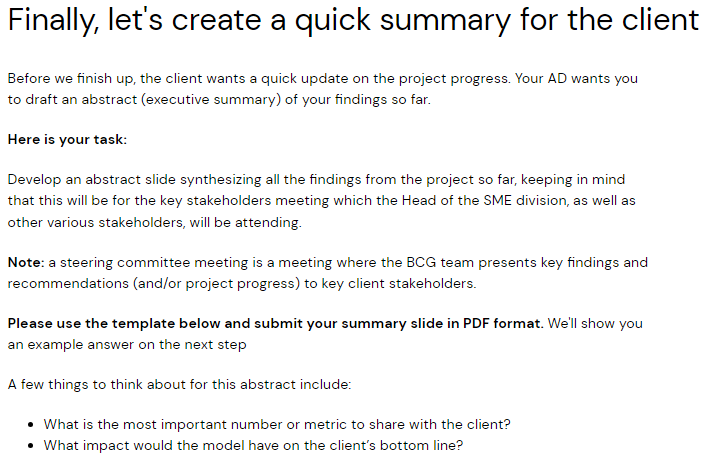

Template summary slide in PDF Format [PDF CLICK HERE!!](https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1692822473671/Executive%20Summary%20Best%20Practices%20(1).pdf)

#Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

##Client Dataset

In [ ]:
client_df = pd.read_csv("/content/drive/MyDrive/bcgx/client_data.csv")
client_df.sample(3)

id                     channel_sales  \
493    9da06128ab5a3cb7626dae3387d31dc6  lmkebamcaaclubfxadlmueccxoimlema   
2964   c78d3997a68d717cda5f0e400173a764  lmkebamcaaclubfxadlmueccxoimlema   
12075  9d15f5742edb018934b47bfc197c9cbb  usilxuppasemubllopkaafesmlibmsdf   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
493       39461             0             2414  2011-11-24  2016-11-24   
2964     870580             0           109135  2010-04-21  2016-04-21   
12075      2553             0                0  2012-10-18  2016-11-12   

      date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
493        2011-11-24   2015-11-25            1878.07                   0   
2964       2010-04-21   2015-04-22            5570.00                   0   
12075      2015-09-18   2015-11-13             376.96                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
493                         0.0                    16.38   
2964                        0.0                    15.43   
12075                       0.0                     5.81   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
493                          0.145789                    0.000000   
2964                         0.164058                    0.086163   
12075                        0.141434                    0.000000   

       forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
493                      44.311378       f       0.0                  6.42   
2964                     44.311378       f       0.0                 21.16   
12075                    44.311378       f       0.0                  5.49   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
493                  6.42            1      175.32                4   
2964                21.16            1      630.99                6   
12075                5.49            1       38.67                3   

                              origin_up  pow_max  churn  
493    kamkkxfxxuwbdslkwifmmcsiusiuosws    13.80      0  
2964   kamkkxfxxuwbdslkwifmmcsiusiuosws    11.40      0  
12075  ldkssxwpmemidmecebumciepifcamkci    10.35      0

In [ ]:
client_df.shape

(14606, 26)

In [ ]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [ ]:
client_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698
churn                                 2
dtype: int64

In [ ]:
client_df['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

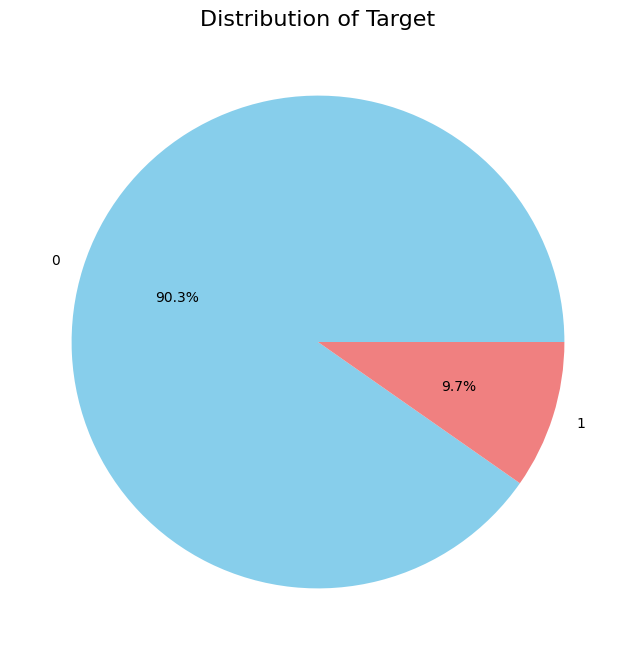

In [ ]:
target_counts=client_df['churn'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Target', fontsize=16)
plt.show()

## Price Dataset (Before)

In [ ]:
price_df = pd.read_csv("/content/drive/MyDrive/bcgx/price_data.csv")
price_df.head(15)

id  price_date  price_off_peak_var  \
0   038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1   038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2   038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3   038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4   038af19179925da21a25619c5a24b745  2015-05-01            0.149626   
5   038af19179925da21a25619c5a24b745  2015-06-01            0.149626   
6   038af19179925da21a25619c5a24b745  2015-07-01            0.150321   
7   038af19179925da21a25619c5a24b745  2015-08-01            0.145859   
8   038af19179925da21a25619c5a24b745  2015-09-01            0.145859   
9   038af19179925da21a25619c5a24b745  2015-10-01            0.145859   
10  038af19179925da21a25619c5a24b745  2015-11-01            0.145859   
11  038af19179925da21a25619c5a24b745  2015-12-01            0.145859   
12  31f2ce549924679a3cbb2d128ae9ea43  2015-01-01            0.125976   
13  31f2ce549924679a3cbb2d128ae9ea43  2015-02-01            0.125976   
14  31f2ce549924679a3cbb2d128ae9ea43  2015-03-01            0.125976   

    price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0         0.000000            0.000000           44.266931        0.000000   
1         0.000000            0.000000           44.266931        0.000000   
2         0.000000            0.000000           44.266931        0.000000   
3         0.000000            0.000000           44.266931        0.000000   
4         0.000000            0.000000           44.266931        0.000000   
5         0.000000            0.000000           44.266930        0.000000   
6         0.000000            0.000000           44.444710        0.000000   
7         0.000000            0.000000           44.444710        0.000000   
8         0.000000            0.000000           44.444710        0.000000   
9         0.000000            0.000000           44.444710        0.000000   
10        0.000000            0.000000           44.444710        0.000000   
11        0.000000            0.000000           44.444710        0.000000   
12        0.103395            0.071536           40.565969       24.339581   
13        0.103395            0.071536           40.565969       24.339581   
14        0.103395            0.071536           40.565969       24.339581   

    price_mid_peak_fix  
0             0.000000  
1             0.000000  
2             0.000000  
3             0.000000  
4             0.000000  
5             0.000000  
6             0.000000  
7             0.000000  
8             0.000000  
9             0.000000  
10            0.000000  
11            0.000000  
12           16.226389  
13           16.226389  
14           16.226389

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

Grouping the data based on the *average* price for each customer, we analyze the differences and maximum prices. The *difference prices* help determine if customer churn is correlated with price sensitivity, while the *maximum prices* indicates is there a possibility the customer's propensity to churn at the hight price for modelling.

WITH DateMinMax AS (
    SELECT
        id,
        MAX(price_date) AS max_date,
        MIN(price_date) AS min_date
    FROM
        bcgx-417416.bcgx.c
    GROUP BY
        id
)

SELECT
    d.id,
    date_diff(d.max_date, d.min_date, DAY) AS usage_time,
    AVG(c.price_off_peak_var) AS avg_price_off_peak_var,
    AVG(c.price_peak_var) AS avg_price_peak_var,
    AVG(c.price_mid_peak_var) AS avg_price_mid_peak_var,
    AVG(c.price_off_peak_fix) AS avg_price_off_peak_fix,
    AVG(c.price_peak_fix) AS avg_price_peak_fix,
    AVG(c.price_mid_peak_fix) AS avg_price_mid_peak_fix,
    MAX(c.price_off_peak_var) AS max_price_off_peak_var,
    MAX(c.price_peak_var) AS max_price_peak_var,
    MAX(c.price_mid_peak_var) AS max_price_mid_peak_var,
    MAX(c.price_off_peak_fix) AS max_price_off_peak_fix,
    MAX(c.price_peak_fix) AS max_price_peak_fix,
    MAX(c.price_mid_peak_fix) AS max_price_mid_peak_fix,
    d.max_date,
    d.min_date,
    MAX(c.price_off_peak_var) - MIN(c.price_off_peak_var) AS price_diff_off_peak_var,
    MAX(c.price_peak_var) - MIN(c.price_peak_var) AS price_diff_peak_var,
    MAX(c.price_mid_peak_var) - MIN(c.price_mid_peak_var) AS price_diff_mid_peak_var,
    MAX(c.price_off_peak_fix) - MIN(c.price_off_peak_fix) AS price_diff_off_peak_fix,
    MAX(c.price_peak_fix) - MIN(c.price_peak_fix) AS price_diff_peak_fix,
    MAX(c.price_mid_peak_fix) - MIN(c.price_mid_peak_fix) AS price_diff_mid_peak_fix
FROM
    bcgx-417416.bcgx.c c
JOIN
    DateMinMax d ON d.id = c.id
GROUP BY
    d.id, d.max_date, d.min_date;


## Price Dataset (After)

In [ ]:
price_avg = pd.read_csv('/content/drive/MyDrive/bcgx/price_data_avg_diff_max.csv')
price_avg.sample(3)

id  usage_time  avg_price_off_peak_var  \
5965   e93942d3356da6cf008d22ede9bc7878         334                0.118602   
5569   c3d20b11a120c132f891adfe04d47fd6         334                0.127914   
15092  c8b97ba42aa82bf6334f3bf0a176b365         334                0.124174   

       avg_price_peak_var  avg_price_mid_peak_var  avg_price_off_peak_fix  \
5965             0.098213                0.069100               40.661003   
5569             0.107370                0.076736               40.701732   
15092            0.103638                0.072865               40.688156   

       avg_price_peak_fix  avg_price_mid_peak_fix  max_price_off_peak_var  \
5965            24.396601               16.264402                0.123086   
5569            24.421038               16.280694                0.131549   
15092           24.412893               16.275263                0.128067   

       max_price_peak_var  max_price_mid_peak_var  max_price_off_peak_fix  \
5965             0.100505                0.069463               40.728885   
5569             0.109324                0.077255               40.728885   
15092            0.105842                0.073773               40.728885   

       max_price_peak_fix  max_price_mid_peak_fix    max_date    min_date  \
5965             24.43733               16.291555  2015-12-01  2015-01-01   
5569             24.43733               16.291555  2015-12-01  2015-01-01   
15092            24.43733               16.291555  2015-12-01  2015-01-01   

       price_diff_off_peak_var  price_diff_peak_var  price_diff_mid_peak_var  \
5965                  0.010018             0.005120                 0.000817   
5569                  0.008161             0.004169                 0.002977   
15092                 0.008161             0.004169                 0.003541   

       price_diff_off_peak_fix  price_diff_peak_fix  price_diff_mid_peak_fix  
5965                  0.162916             0.097749                 0.065166  
5569                  0.162916             0.097749                 0.065166  
15092                 0.162916             0.097749                 0.065166

In [ ]:
price_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       16096 non-null  object 
 1   usage_time               16096 non-null  int64  
 2   avg_price_off_peak_var   16096 non-null  float64
 3   avg_price_peak_var       16096 non-null  float64
 4   avg_price_mid_peak_var   16096 non-null  float64
 5   avg_price_off_peak_fix   16096 non-null  float64
 6   avg_price_peak_fix       16096 non-null  float64
 7   avg_price_mid_peak_fix   16096 non-null  float64
 8   max_price_off_peak_var   16096 non-null  float64
 9   max_price_peak_var       16096 non-null  float64
 10  max_price_mid_peak_var   16096 non-null  float64
 11  max_price_off_peak_fix   16096 non-null  float64
 12  max_price_peak_fix       16096 non-null  float64
 13  max_price_mid_peak_fix   16096 non-null  float64
 14  max_date              

In [ ]:
price_avg.describe()

usage_time  avg_price_off_peak_var  avg_price_peak_var  \
count  16096.000000            16096.000000        16096.000000   
mean     333.888917                0.141022            0.054636   
std        3.214612                0.024184            0.049505   
min      183.000000                0.000000            0.000000   
25%      334.000000                0.124068            0.000000   
50%      334.000000                0.147251            0.085936   
75%      334.000000                0.150171            0.102290   
max      334.000000                0.278759            0.196275   

       avg_price_mid_peak_var  avg_price_off_peak_fix  avg_price_peak_fix  \
count            16096.000000            16096.000000        16096.000000   
mean                 0.030503               43.334758           10.625528   
std                  0.036016                5.342514           12.756070   
min                  0.000000                0.000000            0.000000   
25%                  0.000000               40.688156            0.000000   
50%                  0.000000               44.281745            0.000000   
75%                  0.072525               44.370635           24.388455   
max                  0.102951               59.444710           36.490691   

       avg_price_mid_peak_fix  max_price_off_peak_var  max_price_peak_var  \
count            16096.000000            16096.000000        16096.000000   
mean                 6.411368                0.145316            0.059323   
std                  7.718998                0.025228            0.050305   
min                  0.000000                0.000000            0.000000   
25%                  0.000000                0.128067            0.000000   
50%                  0.000000                0.149555            0.087421   
75%                 16.248109                0.153048            0.104660   
max                 16.818917                0.280700            0.229788   

       max_price_mid_peak_var  max_price_off_peak_fix  max_price_peak_fix  \
count            16096.000000            16096.000000        16096.000000   
mean                 0.031412               43.620663           10.797482   
std                  0.036984                5.389714           12.896821   
min                  0.000000                0.000000            0.000000   
25%                  0.000000               40.728885            0.000000   
50%                  0.000000               44.444710            0.000000   
75%                  0.073773               44.444710           24.437330   
max                  0.114102               59.444710           36.490692   

       max_price_mid_peak_fix  price_diff_off_peak_var  price_diff_peak_var  \
count            16096.000000             16096.000000         16096.000000   
mean                 6.524310                 0.009902             0.007276   
std                  7.819601                 0.014042             0.018920   
min                  0.000000                 0.000000             0.000000   
25%                  0.000000                 0.004462             0.000000   
50%                  0.000000                 0.007434             0.003115   
75%                 16.291555                 0.008979             0.004524   
max                 17.458221                 0.236095             0.152042   

       price_diff_mid_peak_var  price_diff_off_peak_fix  price_diff_peak_fix  \
count             16096.000000             16096.000000         16096.000000   
mean                  0.003511                 0.557788             0.881505   
std                   0.013465                 2.535132             4.588963   
min                   0.000000                 0.000000             0.000000   
25%                   0.000000                 0.000004             0.000000   
50%                   0.000000                 0.177779             0.000000   
75%                   0.002322                 0.17

##Merge Data

In [ ]:
df = pd.merge(client_df, price_avg, on='id', how='left')
df.sample(4)

id                     channel_sales  \
12193  8589c4f42b520b35d928463d2e204cdc                           MISSING   
8789   977b625b598cd0ba2c50364b81881b87  lmkebamcaaclubfxadlmueccxoimlema   
11052  fa64c30044ce822f04a27145eb5fa63b  foosdfpfkusacimwkcsosbicdxkicaua   
9906   edcec885e3060cad7545225e6b301cff  lmkebamcaaclubfxadlmueccxoimlema   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
12193      2873             0                0  2010-11-22  2016-11-22   
8789    2170560         33185           230072  2010-05-21  2016-03-16   
11052      2436             0                0  2010-02-04  2016-02-04   
9906     625918             0            62898  2011-05-02  2016-05-02   

      date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
12193      2013-10-10   2015-11-23             316.91                   0   
8789       2010-05-21   2015-03-17            8261.47               22834   
11052      2014-09-08   2015-02-09             232.57                   0   
9906       2011-05-02   2015-05-03            5923.53                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
12193                       0.0                    17.20   
8789                        0.0                    17.93   
11052                       0.0                   131.31   
9906                        0.0                     0.00   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
12193                        0.168242                    0.089602   
8789                         0.164058                    0.086163   
11052                        0.116900                    0.100015   
9906                         0.142819                    0.000000   

       forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
12193                    45.806878       f       0.0                 22.89   
8789                     44.311378       t    2540.4                 21.12   
11052                    40.606701       f       0.0                 60.60   
9906                     44.311378       f       0.0                 21.90   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
12193               22.89            1       31.66                5   
8789                21.12            2      564.12                6   
11052               60.60            1       30.45                6   
9906                21.90            1      487.99                5   

                              origin_up  pow_max  churn  usage_time  \
12193  ldkssxwpmemidmecebumciepifcamkci   13.856      0         334   
8789   kamkkxfxxuwbdslkwifmmcsiusiuosws   10.260      0         334   
11052  kamkkxfxxuwbdslkwifmmcsiusiuosws   24.249      1         334   
9906   kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0         334   

       avg_price_off_peak_var  avg_price_peak_var  avg_price_mid_peak_var  \
12193                0.166635            0.085229                0.000000   
8789                 0.168480            0.086500                0.000000   
11052                0.124421            0.103862                0.073206   
9906                 0.147320            0.000000                0.000000   

       avg_price_off_peak_fix  avg_price_peak_fix  avg_price_mid_peak_fix  \
12193               44.406745             0.00000                0.000000   
8789                44.400265             0.00000                0.000000   
11052               40.728885            24.43733               16.291555   
9906                44.370635             0.00000                0.000000   

       max_price_off_peak_var  max_price_peak_var  max_price_mid_peak_var  \
12193                0.170254            0.090117                0.000000   
8789                 0.170685            0.087421                0.000000   
11052                0.128067            0.105842                0.073773   
9906                 0.149204            0.000000               

In [ ]:
df.shape

(14606, 47)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
usage_time                        0
avg_price_off_peak_var            0
avg_price_peak_var                0
avg_price_mid_peak_var            0
avg_price_off_peak_fix            0
avg_price_peak_fix                0
avg_price_mid_peak_fix            0
max_price_off_peak_var            0
max_price_peak_var                0
max_price_mid_peak_var            0
max_price_off_peak_fix            0
max_price_peak_fix                0
max_price_mid_peak_fix            0
max_date                          0
min_date                          0
price_diff_off_peak_var           0
price_diff_peak_var               0
price_diff_mid_peak_var           0
price_diff_off_peak_fix           0
price_diff_peak_fix               0
price_diff_mid_peak_fix           0
dtype: int64

#Exploratory Data Analysis

##Client_df

###Numeric Distribution

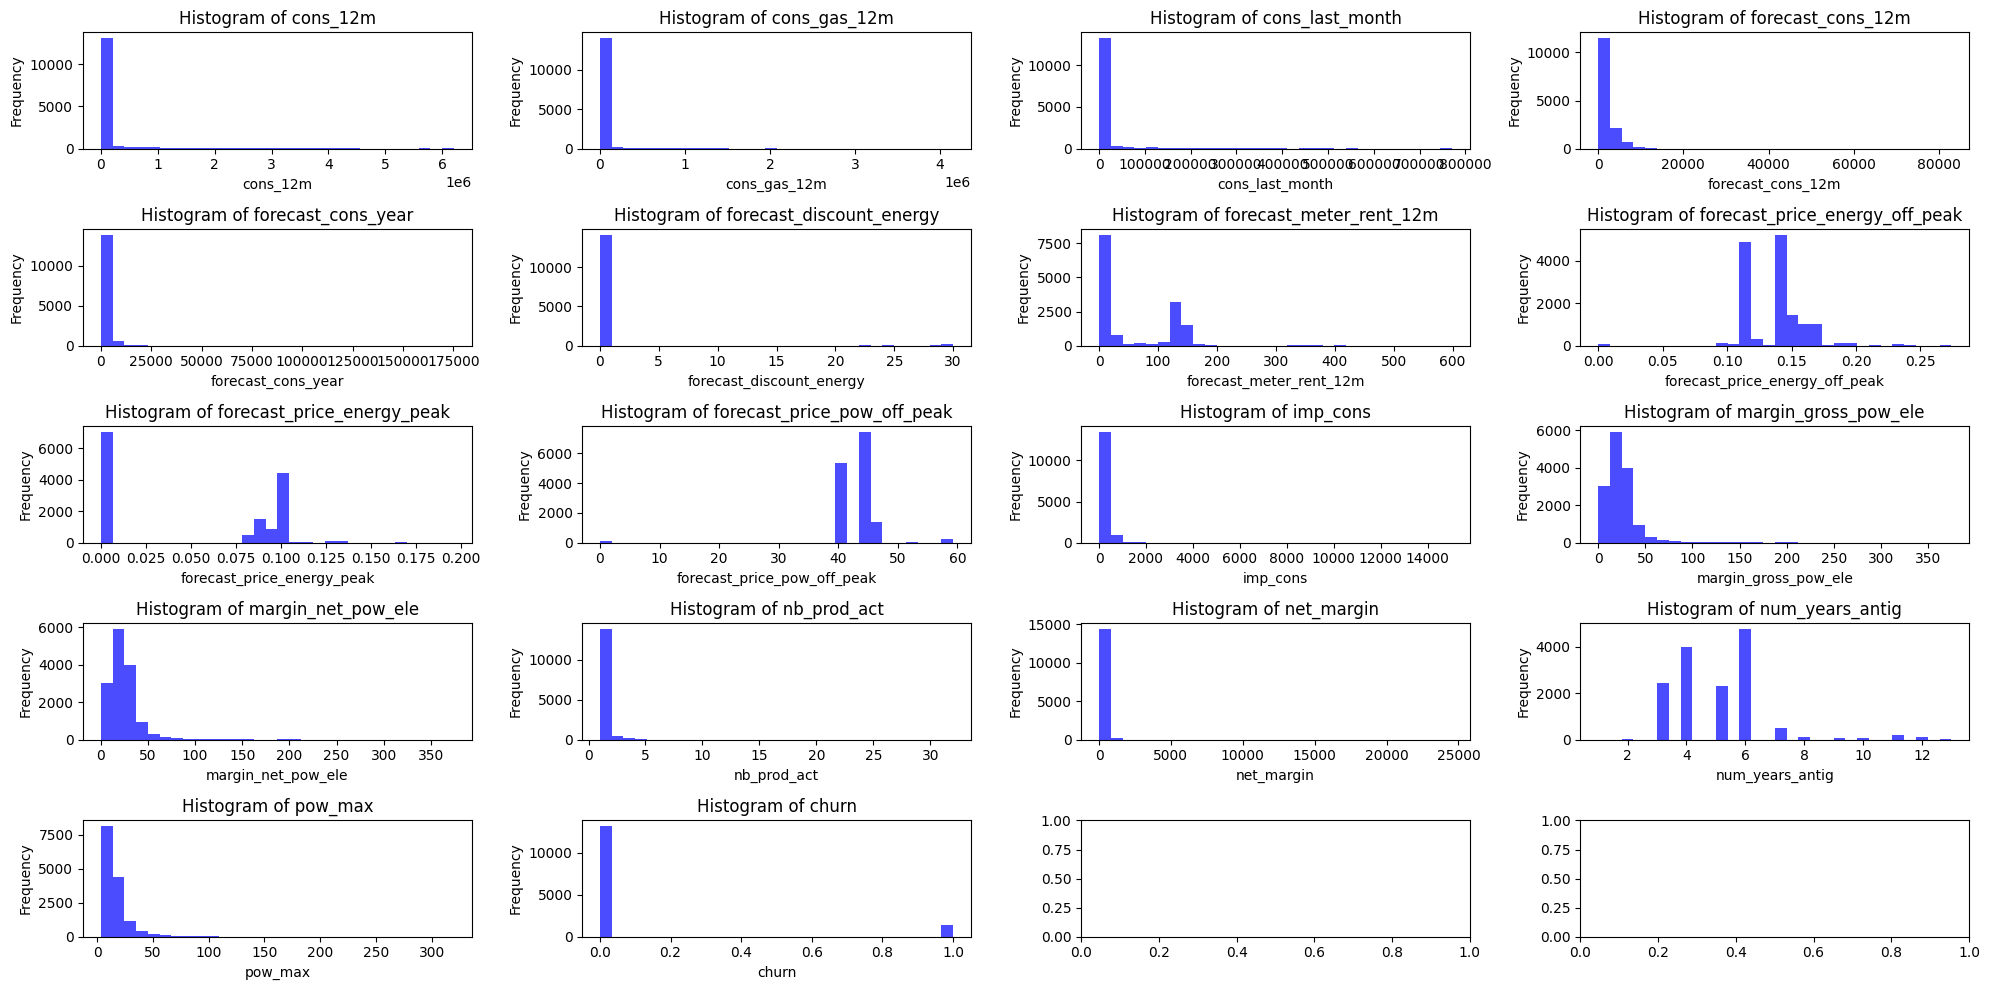

In [ ]:
num_col = client_df.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 10), tight_layout=True)

for i, column in enumerate(num_col):
    axs[i // 4, i % 4].hist(client_df[column], bins=30, color='blue', alpha=0.7)
    axs[i // 4, i % 4].set_title(f'Histogram of {column}')
    axs[i // 4, i % 4].set_xlabel(column)
    axs[i // 4, i % 4].set_ylabel('Frequency')


plt.show()

###Churn Insight Distribution

In [ ]:
client_df.nunique()[client_df.nunique()<20]

channel_sales                8
forecast_discount_energy    12
has_gas                      2
nb_prod_act                 10
num_years_antig             13
origin_up                    6
churn                        2
dtype: int64

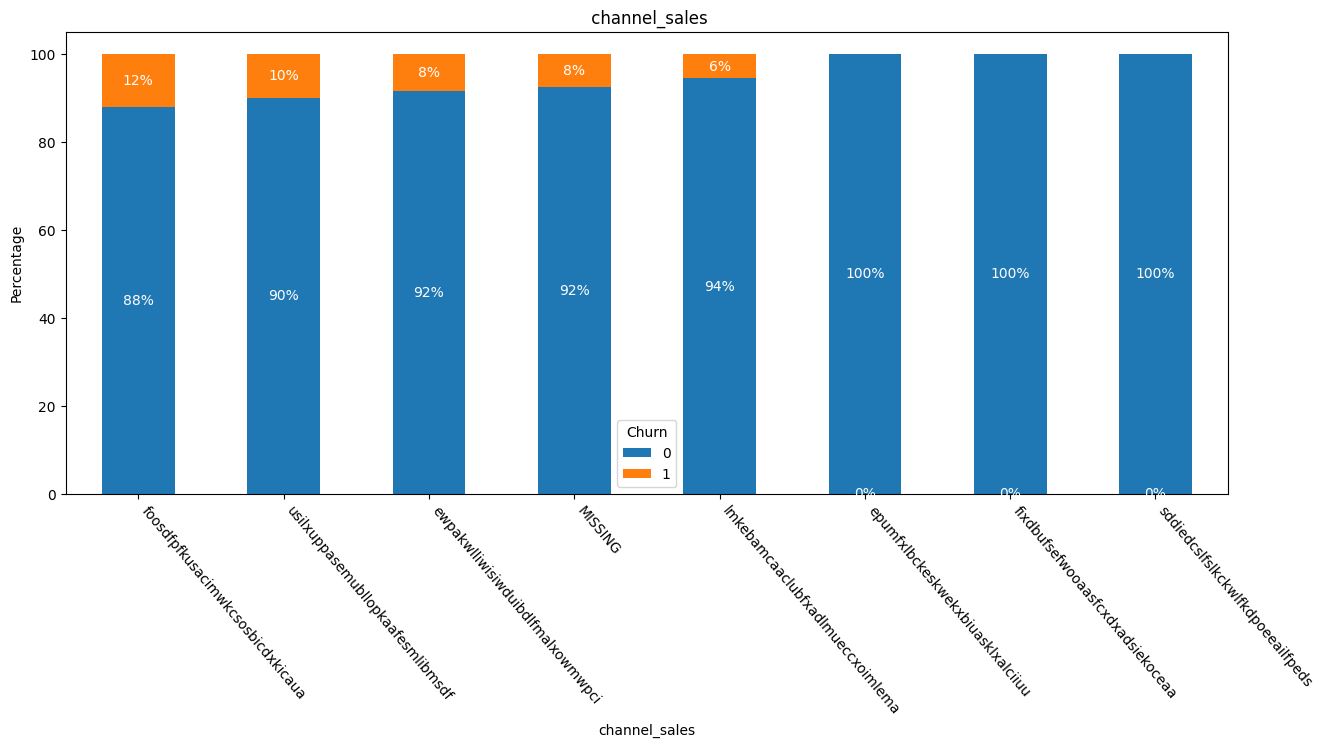

In [ ]:


def plot_stacked_bars(data, title):
    fig, ax = plt.subplots(figsize=(15, 6))  # Perbesar plot
    data.plot(kind='bar', stacked=True, ax=ax)
    plt.title(title)
    plt.ylabel('Percentage')
    plt.xticks(rotation=-50, ha='left')
    plt.legend(title='Churn')

    # Tambahkan label persentase
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

    plt.show()

# Data kontrak
contract_type = client_df[['id', 'channel_sales', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['channel_sales']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Plot
plot_stacked_bars(contract_percentage, ' channel_sales')



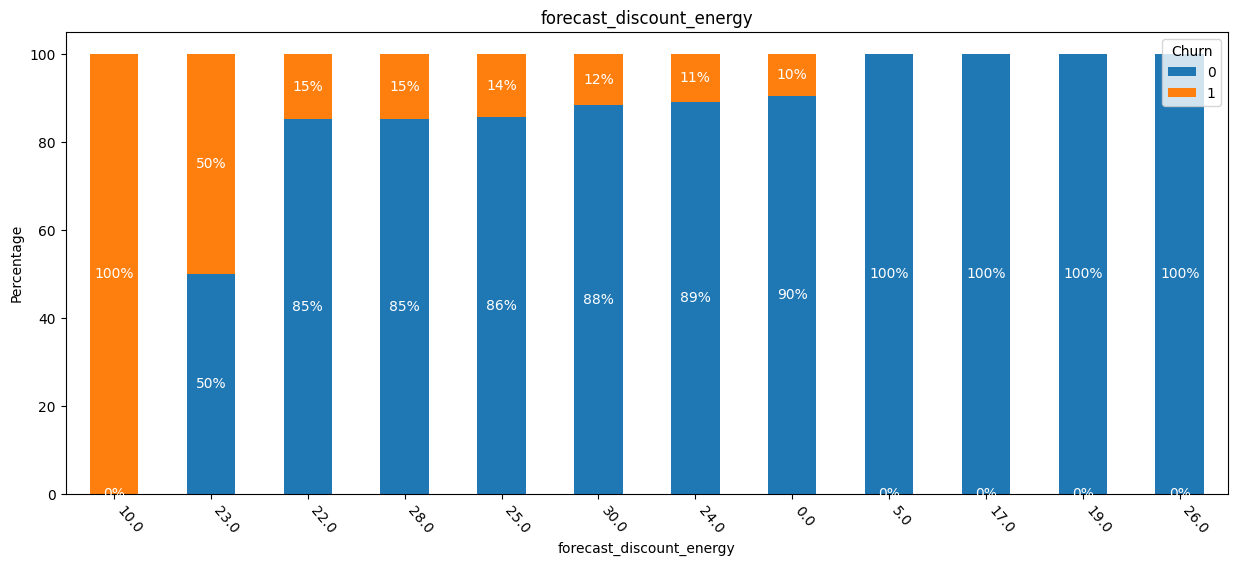

In [ ]:
# Data kontrak
contract_type = client_df[['id', 'forecast_discount_energy', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['forecast_discount_energy']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Plot
plot_stacked_bars(contract_percentage, 'forecast_discount_energy')

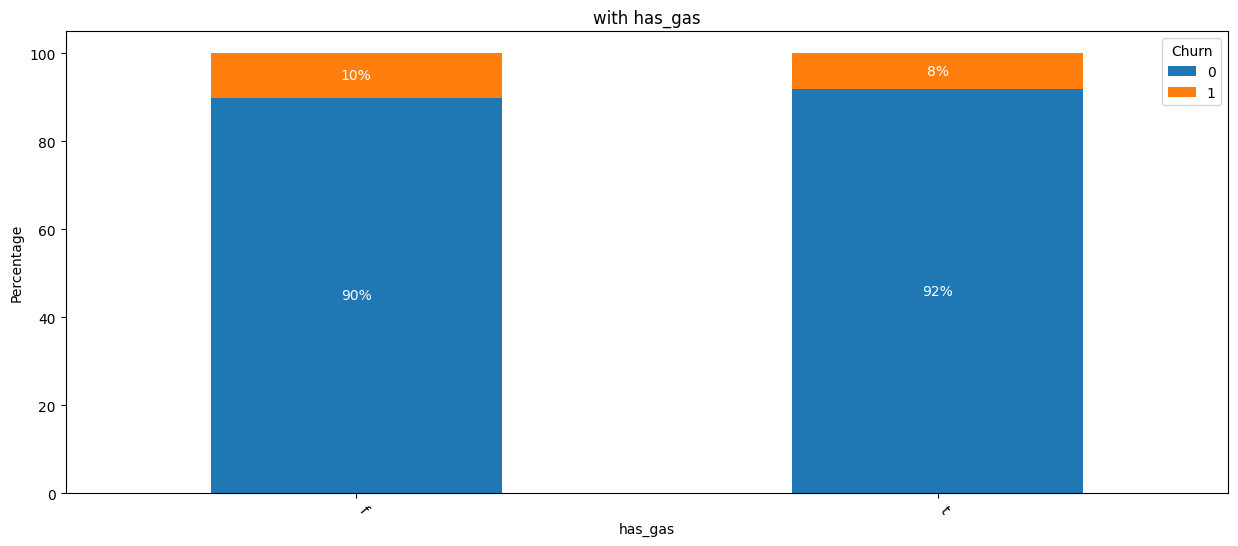

In [ ]:
# Data kontrak
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Plot
plot_stacked_bars(contract_percentage, 'with has_gas')

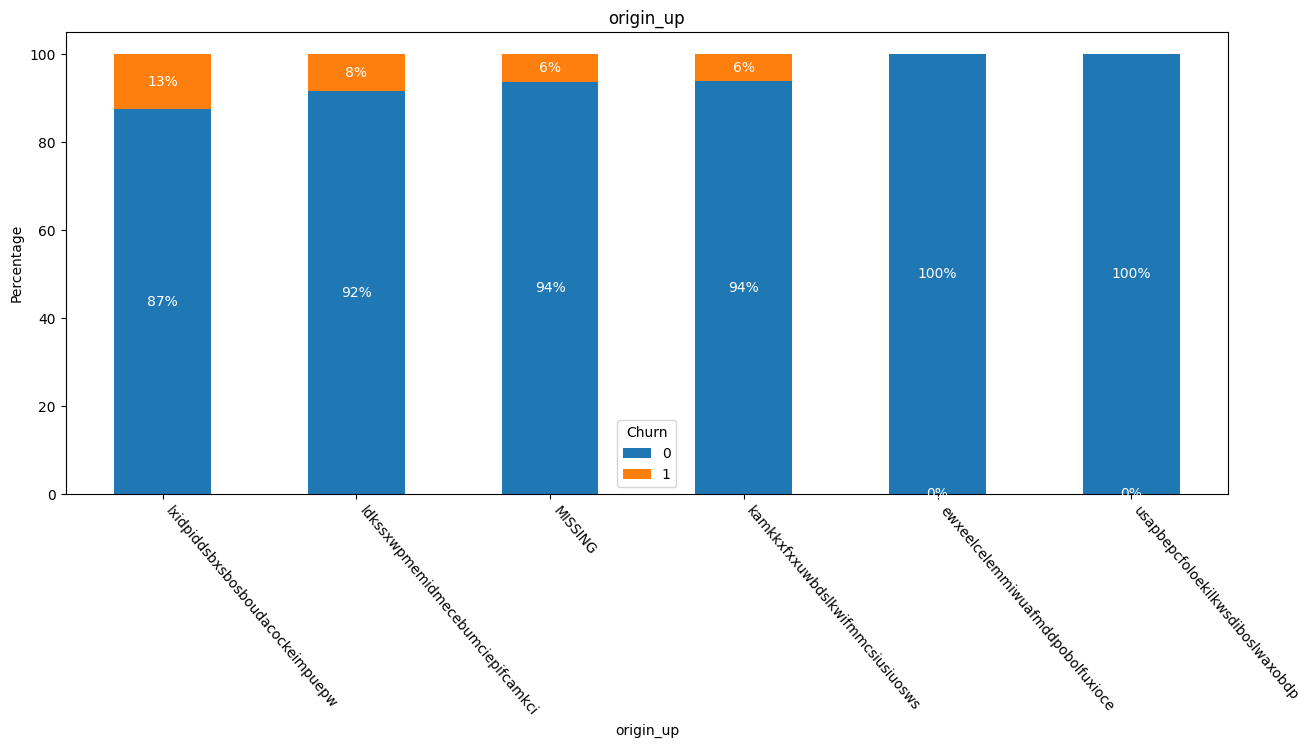

In [ ]:
# Data kontrak
contract_type = client_df[['id', 'origin_up', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['origin_up']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Plot
plot_stacked_bars(contract_percentage, 'origin_up')

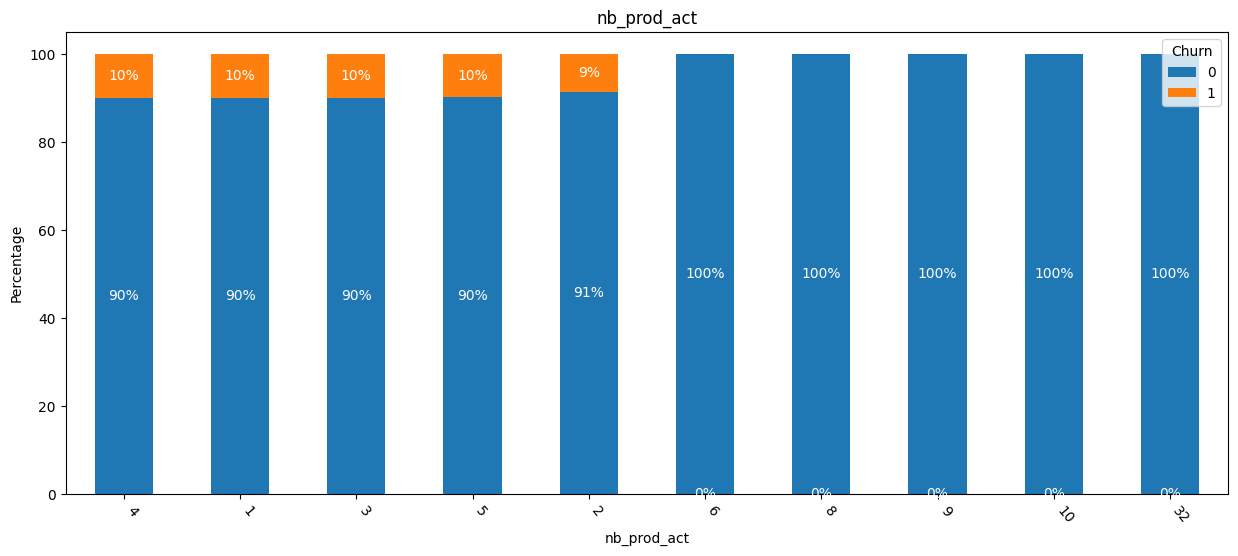

In [ ]:


# Data kontrak
contract_type = client_df[['id', 'nb_prod_act', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['nb_prod_act']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Plot
plot_stacked_bars(contract_percentage, 'nb_prod_act')

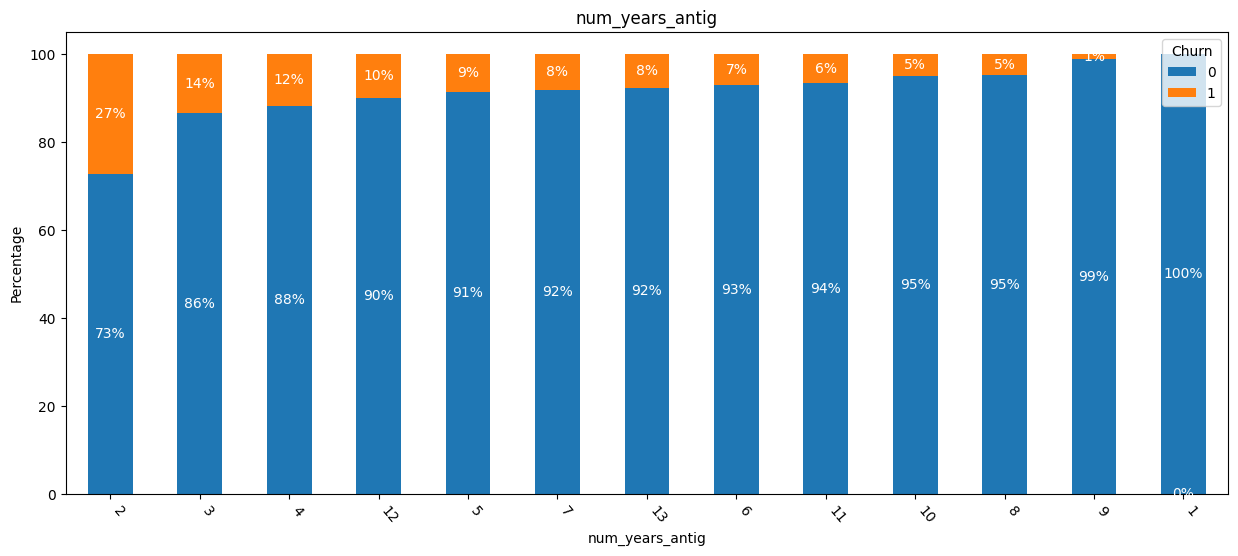

In [ ]:
# Data kontrak
contract_type = client_df[['id', 'num_years_antig', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['num_years_antig']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Plot
plot_stacked_bars(contract_percentage, 'num_years_antig')

##Price_df

###Numeric Distribution

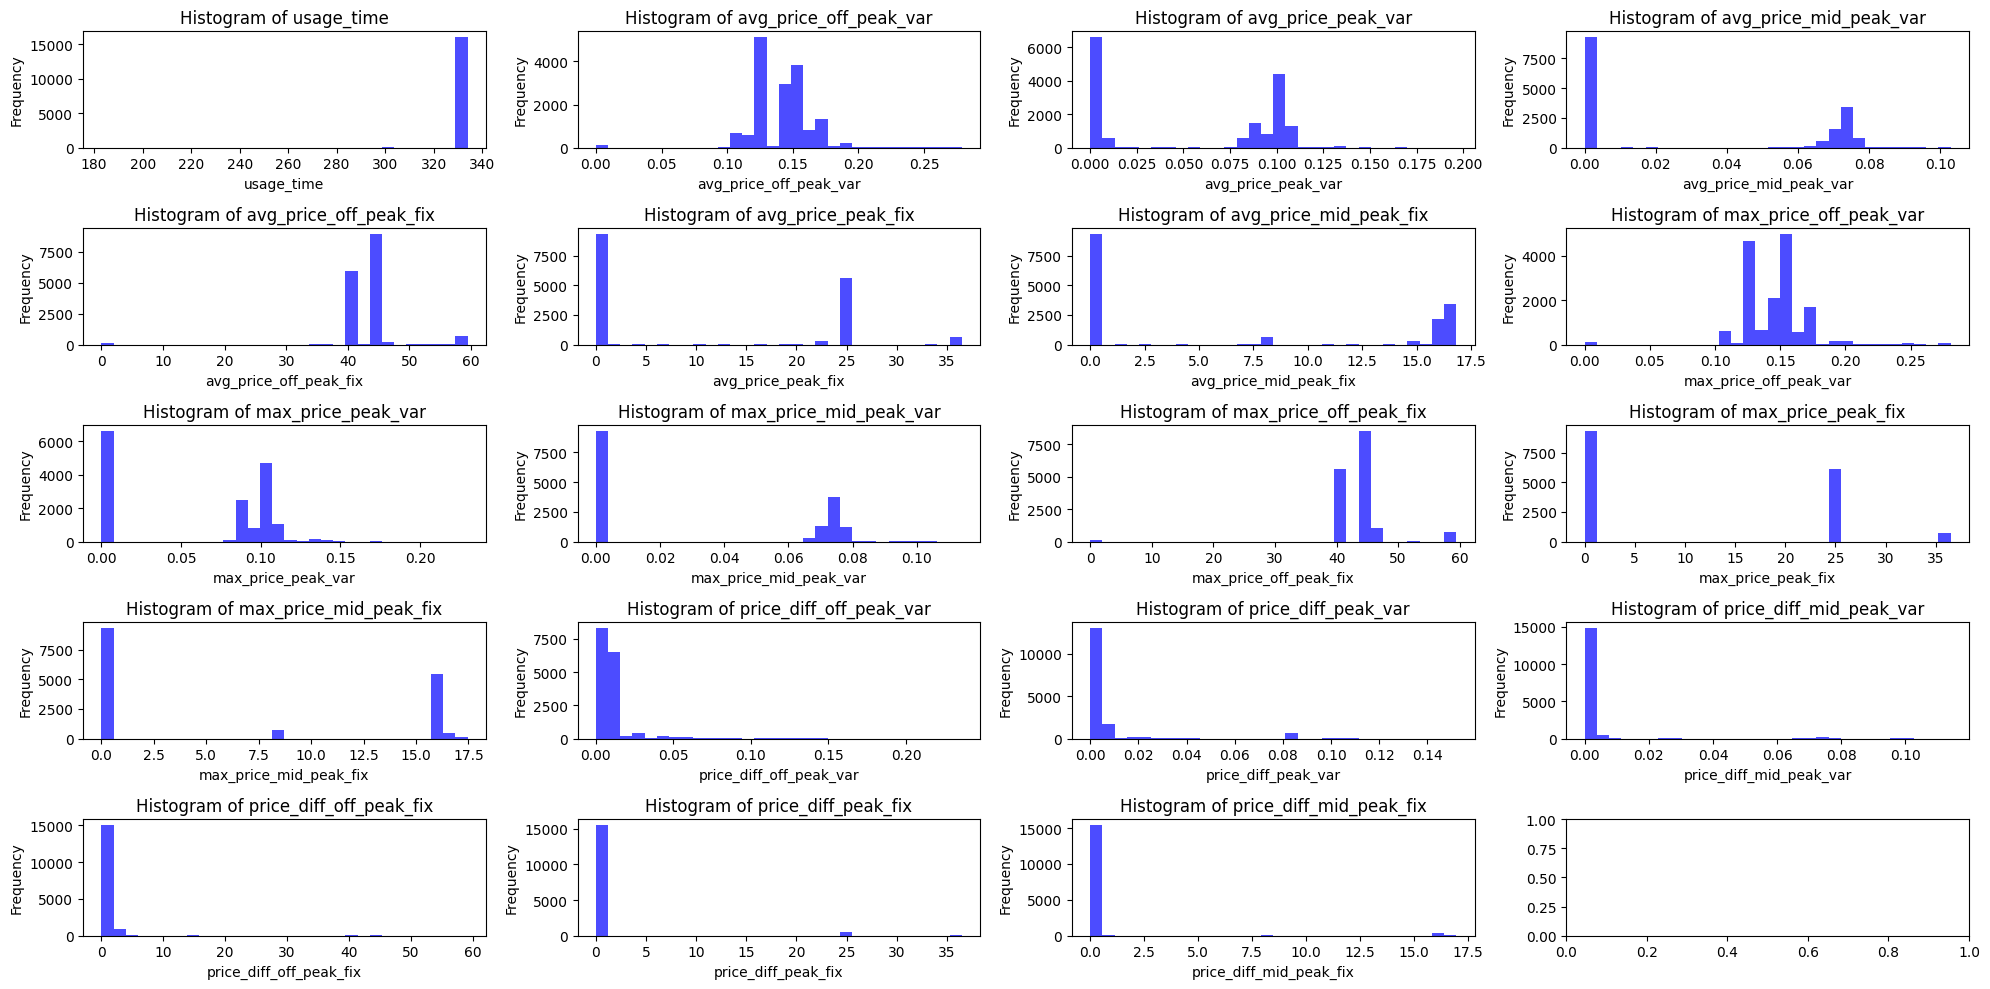

In [ ]:
num_col = price_avg.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 10), tight_layout=True)

for i, column in enumerate(num_col):
    axs[i // 4, i % 4].hist(price_avg[column], bins=30, color='blue', alpha=0.7)
    axs[i // 4, i % 4].set_title(f'Histogram of {column}')
    axs[i // 4, i % 4].set_xlabel(column)
    axs[i // 4, i % 4].set_ylabel('Frequency')


plt.show()

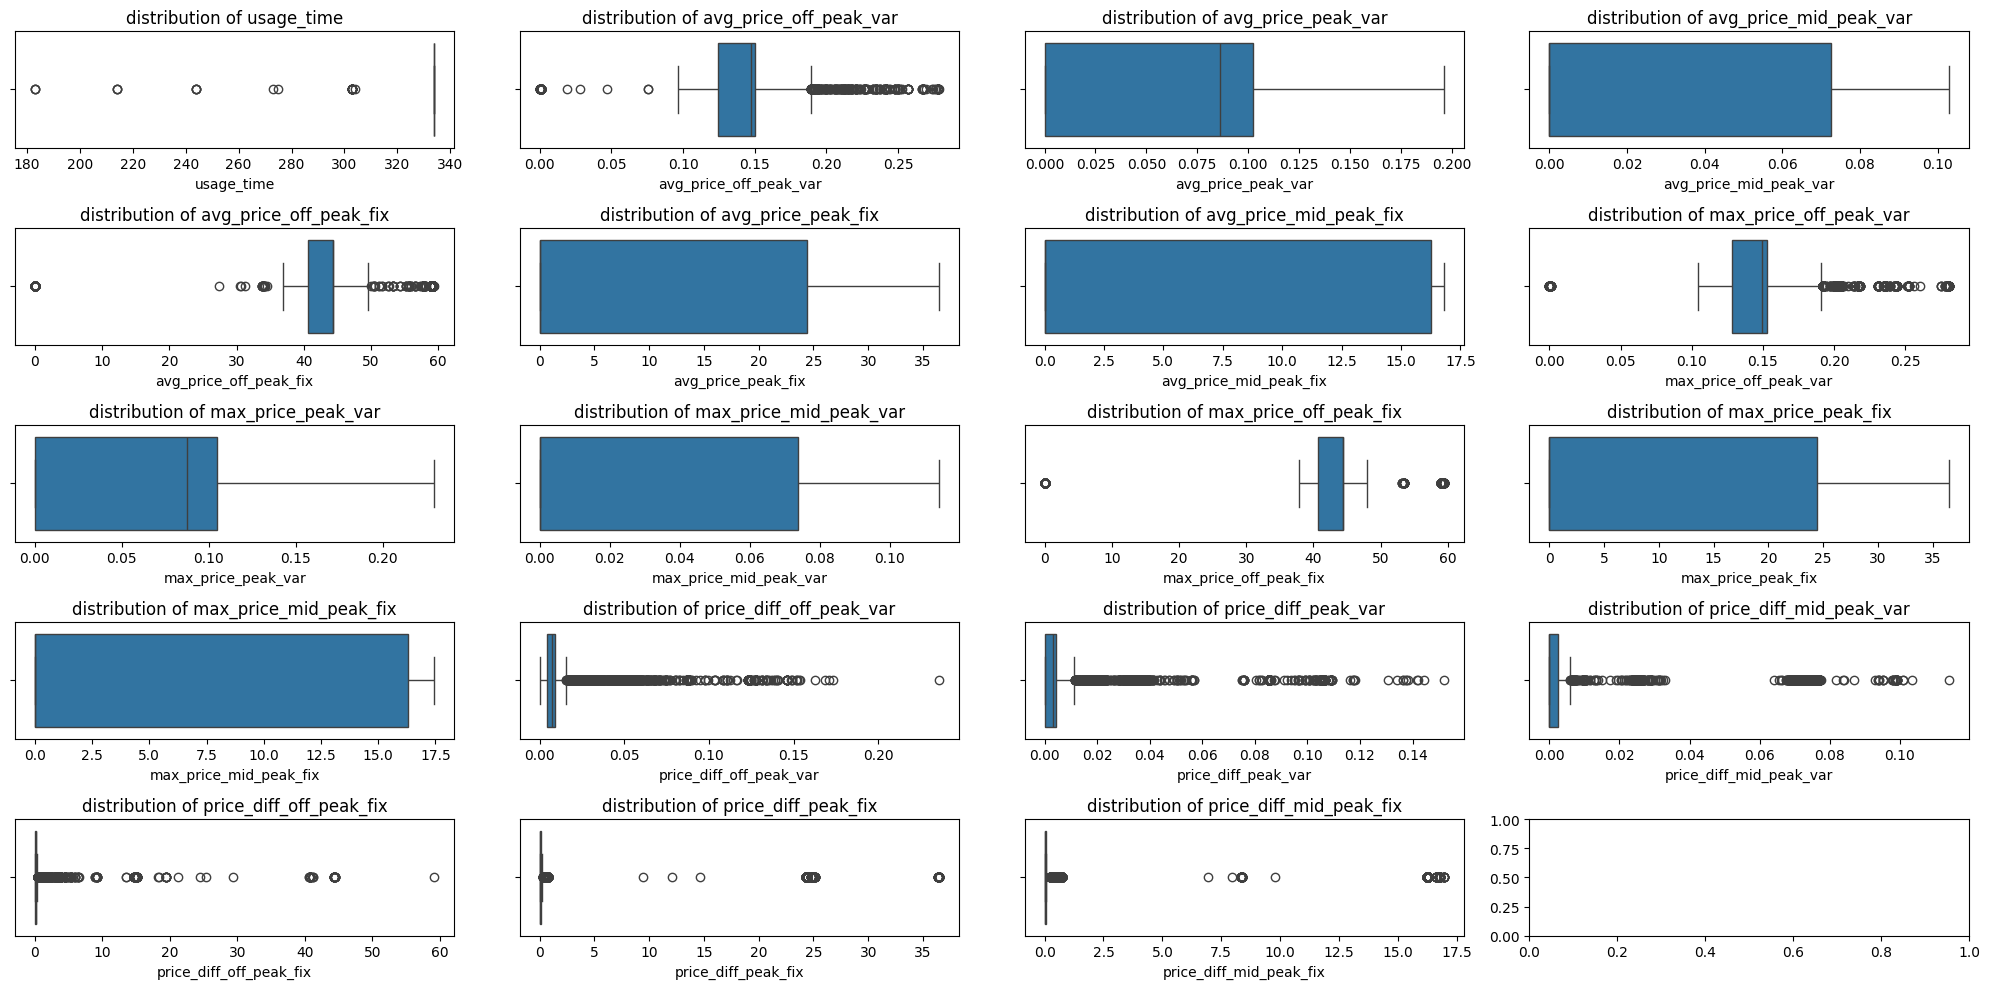

In [ ]:
num_col = price_avg.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(num_col):
    sns.boxplot(x=price_avg[column], ax=axs[i])
    axs[i].set_title(f'distribution of {column}')
    axs[i].set_xlabel(column)

plt.tight_layout()
plt.show()

#Data Preprocessing

##Feature Engineering

In [ ]:
df.sample(4)

id                     channel_sales  \
5710   a8be1af4d782cc4d0704cca614a022f3                           MISSING   
11000  a81a3d6efae8a0a620852d20898950b9  foosdfpfkusacimwkcsosbicdxkicaua   
8277   7f03e20c71bfe00365dfa41a30583210                           MISSING   
6421   d500c49b61206a9cfc98088ff9759189  foosdfpfkusacimwkcsosbicdxkicaua   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
5710      49149             0             4567  2010-10-27  2016-10-25   
11000      7114             0             1033  2010-10-15  2016-10-15   
8277       6160             0                0  2010-12-01  2016-12-01   
6421     725751             0            48836  2012-11-13  2016-11-13   

      date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
5710       2010-10-27   2015-10-28             335.53                   0   
11000      2015-08-26   2015-10-16            1058.20                1033   
8277       2010-12-01   2015-12-02             783.49                   0   
6421       2015-11-01   2015-11-15            5333.21                4945   

       forecast_discount_energy  forecast_meter_rent_12m  \
5710                        0.0                    15.98   
11000                       0.0                    19.77   
8277                        0.0                    16.00   
6421                        0.0                   131.40   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
5710                         0.147506                    0.000000   
11000                        0.142881                    0.000000   
8277                         0.168243                    0.089611   
6421                         0.115939                    0.100823   

       forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
5710                     46.305378       f      0.00                 21.64   
11000                    45.806878       f    149.34                 18.12   
8277                     45.811378       f      0.00                 21.58   
6421                     40.606701       f    476.17                  2.10   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
5710                21.64            1       34.44                5   
11000               18.12            1       76.01                5   
8277                21.58            1       70.71                5   
6421                 2.10            1      619.17                3   

                              origin_up  pow_max  churn  usage_time  \
5710   kamkkxfxxuwbdslkwifmmcsiusiuosws   10.392      0         334   
11000  lxidpiddsbxsbosboudacockeimpuepw   10.392      1         334   
8277   ldkssxwpmemidmecebumciepifcamkci   13.856      0         334   
6421   ldkssxwpmemidmecebumciepifcamkci   33.000      0         334   

       avg_price_off_peak_var  avg_price_peak_var  avg_price_mid_peak_var  \
5710                 0.150822            0.000000                0.000000   
11000                0.148508            0.000000                0.000000   
8277                 0.169818            0.088501                0.000000   
6421                 0.124926            0.104511                0.074188   

       avg_price_off_peak_fix  avg_price_peak_fix  avg_price_mid_peak_fix  \
5710                44.629894             0.00000                0.000000   
11000               44.546561             0.00000                0.000000   
8277                44.266930             0.00000                0.000000   
6421                40.728885            24.43733               16.291555   

       max_price_off_peak_var  max_price_peak_var  max_price_mid_peak_var  \
5710                 0.152445            0.000000                0.000000   
11000                0.151635            0.000000                0.000000   
8277                 0.171746            0.088815                0.000000   
6421                 0.129810            0.107584               

In [ ]:
df_clean=df.copy()

In [ ]:
df_clean[['date_activ',	'date_end'	,'date_modif_prod'	,'date_renewal',"max_date",	"min_date"]].head(7)

date_activ    date_end date_modif_prod date_renewal    max_date    min_date
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23  2015-12-01  2015-01-01
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31  2015-12-01  2015-01-01
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17  2015-12-01  2015-01-01
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31  2015-12-01  2015-01-01
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09  2015-12-01  2015-01-01
5  2011-12-09  2016-12-09      2015-11-01   2015-12-10  2015-12-01  2015-01-01
6  2011-12-02  2016-12-02      2011-12-02   2015-12-03  2015-12-01  2015-01-01

In [ ]:
import pandas as pd

date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

for column in date_columns:
    df_clean[column] = pd.to_datetime(df_clean[column], format='%Y-%m-%d')


result = df_clean[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']]
result.head(7)

date_activ   date_end date_modif_prod date_renewal
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09
5 2011-12-09 2016-12-09      2015-11-01   2015-12-10
6 2011-12-02 2016-12-02      2011-12-02   2015-12-03

Diff day since date activation

In [ ]:

df_clean['date_activ'] = pd.to_datetime(df_clean['date_activ'])
df_clean['date_end'] = pd.to_datetime(df_clean['date_end'])
df_clean['date_modif_prod'] = pd.to_datetime(df_clean['date_modif_prod'])
df_clean['date_renewal'] = pd.to_datetime(df_clean['date_renewal'])

# Menghitung selisih hari include bulan dengan include tahun
df_clean['day_since_date_end'] = (df_clean['date_end'] - df_clean['date_activ']).dt.days
df_clean['day_since_date_modif_prod'] = (df_clean['date_modif_prod'] - df_clean['date_activ']).dt.days
df_clean['day_since_date_renewal'] = (df_clean['date_modif_prod'] - df_clean['date_activ']).dt.days

df_clean[['day_since_date_end','day_since_date_modif_prod','day_since_date_renewal']]

day_since_date_end  day_since_date_modif_prod  day_since_date_renewal
0                    1096                        869                     869
1                    2566                          0                       0
2                    2192                          0                       0
3                    2192                          0                       0
4                    2245                          0                       0
...                   ...                        ...                     ...
14601                1445                       1079                    1079
14602                1461                          0                       0
14603                1460                          0                       0
14604                1461                          0                       0
14605                2556                          0                       0

[14606 rows x 3 columns]

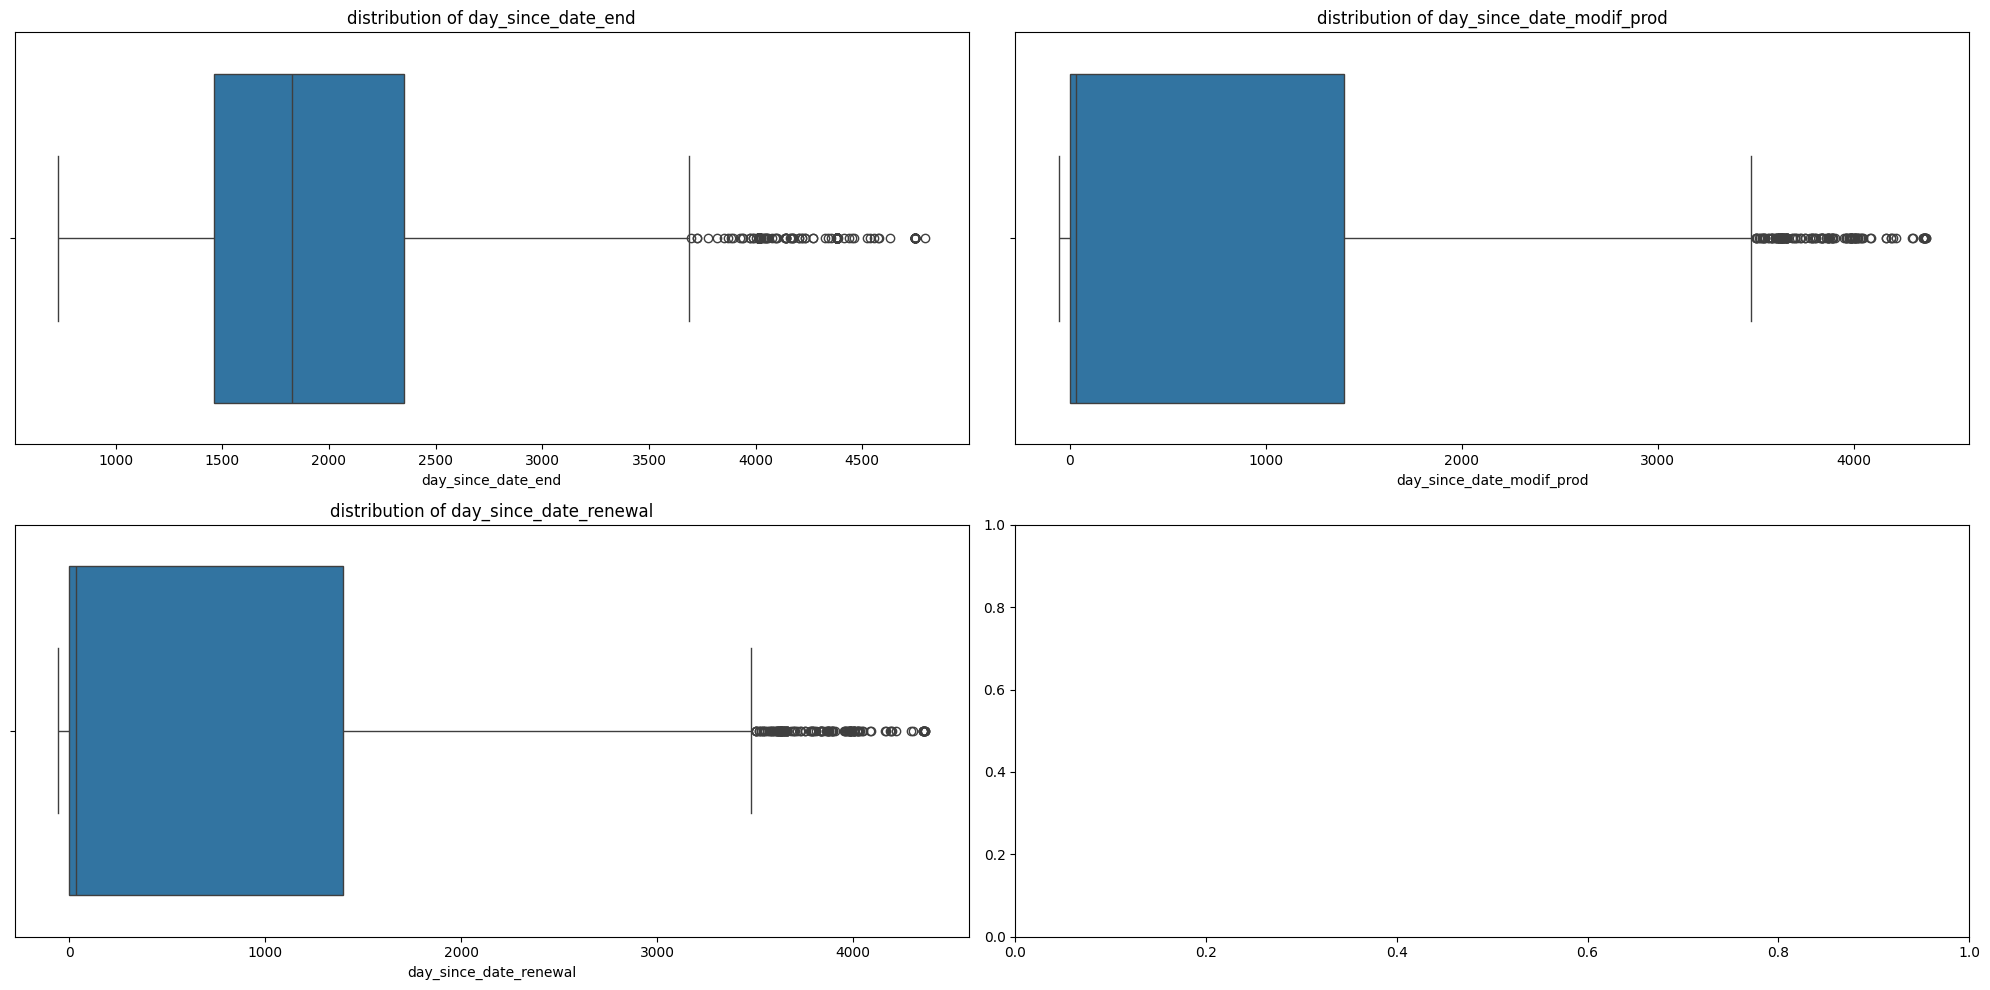

In [ ]:
num_col = ['day_since_date_end','day_since_date_modif_prod','day_since_date_renewal']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(num_col):
    sns.boxplot(x=df_clean[column], ax=axs[i])
    axs[i].set_title(f'distribution of {column}')
    axs[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
df_clean.sample(3)

id                     channel_sales  \
13993  3795cdbe0d13645a9cc617494cd335f1  foosdfpfkusacimwkcsosbicdxkicaua   
1373   f50c26266c1c2aae8de45aca588ef386  lmkebamcaaclubfxadlmueccxoimlema   
11573  63a5920af79b16e79d7bb30893955c5b                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
13993      4294             0              754 2012-08-07 2016-01-28   
1373       7967          3566                0 2010-07-29 2016-07-28   
11573     17004             0                0 2009-09-15 2016-09-15   

      date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
13993      2015-01-28   2014-08-08             618.42                 754   
1373       2010-07-29   2015-07-29            1194.53                   0   
11573      2009-09-15   2015-09-16             298.50                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
13993                       0.0                     8.53   
1373                        0.0                    19.90   
11573                       0.0                    15.75   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
13993                        0.146368                         0.0   
1373                         0.145711                         0.0   
11573                        0.144902                         0.0   

       forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
13993                    45.811378       f    106.78                 27.60   
1373                     44.311378       t      0.00                 18.62   
11573                    44.311378       f      0.00                 10.08   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
13993               27.60            1       63.96                3   
1373                18.62            2      114.39                6   
11573               10.08            1       26.73                6   

                              origin_up  pow_max  churn  usage_time  \
13993  lxidpiddsbxsbosboudacockeimpuepw   11.000      0         334   
1373   ldkssxwpmemidmecebumciepifcamkci   13.200      0         334   
11573  kamkkxfxxuwbdslkwifmmcsiusiuosws   10.392      0         334   

       avg_price_off_peak_var  avg_price_peak_var  avg_price_mid_peak_var  \
13993                0.143937                 0.0                     0.0   
1373                 0.149797                 0.0                     0.0   
11573                0.148612                 0.0                     0.0   

       avg_price_off_peak_fix  avg_price_peak_fix  avg_price_mid_peak_fix  \
13993               44.355820                 0.0                     0.0   
1373                44.341005                 0.0                     0.0   
11573               44.311375                 0.0                     0.0   

       max_price_off_peak_var  max_price_peak_var  max_price_mid_peak_var  \
13993                0.146084                 0.0                     0.0   
1373                 0.151367                 0.0                     0.0   
11573                0.150211                 0.0                     0.0   

       max_price_off_peak_fix  max_price_peak_fix  max_price_mid_peak_fix  \
13993                44.44471                 0.0                     0.0   
1373                 44.44471                 0.0                     0.0   
11573                44.44471                 0.0                     0.0   

         max_date    min_date  price_diff_off_peak_var  price_diff_peak_var  \
13993  2015-12-01  2015-01-01                 0.004462                  0.0   
1373   2015-12-01  2015-01-01                 0.003767                  0.0   
11573  2015-12-01  2015-01-01                 0.004462                  0.0   

       price_diff_mid_peak_var  price_diff_off_peak_fix  price_diff_peak_fix  \
13993                      0.0                  0.17778                  0.0   
1373            

In [ ]:
df_clean.drop(columns=['id','date_activ','date_end','date_modif_prod','date_renewal','max_date','min_date'], inplace=True)

In [ ]:
df_clean.select_dtypes(include=['int', 'float']).columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'usage_time',
       'avg_price_off_peak_var', 'avg_price_peak_var',
       'avg_price_mid_peak_var', 'avg_price_off_peak_fix',
       'avg_price_peak_fix', 'avg_price_mid_peak_fix',
       'max_price_off_peak_var', 'max_price_peak_var',
       'max_price_mid_peak_var', 'max_price_off_peak_fix',
       'max_price_peak_fix', 'max_price_mid_peak_fix',
       'price_diff_off_peak_var', 'price_diff_peak_var',
       'price_diff_mid_peak_var', 'price_diff_off_peak_fix',
       'price_diff_peak_fix', 'price_diff_mid_peak_fix', 'day_since_date_end',
       'day_since_date_modif_prod', 'day_si

In [ ]:
df_clean.shape

(14606, 43)

In [ ]:

# columns_to_remove_outliers = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
#        'forecast_cons_year', 'forecast_discount_energy',
#        'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
#        'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
#        'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
#        'net_margin', 'num_years_antig', 'pow_max', 'usage_time',
#        'avg_price_off_peak_var', 'avg_price_peak_var',
#        'avg_price_mid_peak_var', 'avg_price_off_peak_fix',
#        'avg_price_peak_fix', 'avg_price_mid_peak_fix', 'day_since_date_end',
#        'day_since_date_modif_prod', 'day_since_date_renewal']

# for column in columns_to_remove_outliers:
#     Q1 = df_clean[column].quantile(0.25)
#     Q3 = df_clean[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR


#     df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]


# print("Shape after removing outliers:", df_clean.shape)

Outliers are not removed because the outlier data was a valid outlier. Removing outliers caused the model to overfit




In [ ]:
df_clean['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [ ]:
df_clean.sample(3)

channel_sales  cons_12m  cons_gas_12m  \
11738  foosdfpfkusacimwkcsosbicdxkicaua    264770             0   
4425                            MISSING       388             0   
7112   usilxuppasemubllopkaafesmlibmsdf       333             0   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
11738            14647             342.88                 347   
4425                51               0.00                   0   
7112                 0              38.26                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
11738                       0.0                   143.60   
4425                        0.0                     3.96   
7112                        0.0                    40.46   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
11738                        0.115237                    0.100123   
4425                         0.115157                    0.098834   
7112                         0.164197                    0.085553   

       forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
11738                    41.271364       f      36.6                 47.57   
4425                     40.606701       f       0.0                 19.44   
7112                     46.305378       f       0.0                 27.28   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
11738               47.57            1       34.89                4   
4425                19.44            1        0.00                6   
7112                27.28            1        2.73                4   

                              origin_up  pow_max  churn  usage_time  \
11738  lxidpiddsbxsbosboudacockeimpuepw   23.100      0         334   
4425   kamkkxfxxuwbdslkwifmmcsiusiuosws   17.250      0         334   
7112   kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0         334   

       avg_price_off_peak_var  avg_price_peak_var  avg_price_mid_peak_var  \
11738                0.123874            0.103821                0.073658   
4425                 0.124367            0.100587                0.066563   
7112                 0.168808            0.087488                0.000000   

       avg_price_off_peak_fix  avg_price_peak_fix  avg_price_mid_peak_fix  \
11738               40.773366           24.530684               16.409345   
4425                40.928689           22.343865               14.895910   
7112                44.266930            0.000000                0.000000   

       max_price_off_peak_var  max_price_peak_var  max_price_mid_peak_var  \
11738                0.127566            0.105428                0.074205   
4425                 0.146033            0.103395                0.074516   
7112                 0.171746            0.088815                0.000000   

       max_price_off_peak_fix  max_price_peak_fix  max_price_mid_peak_fix  \
11738               41.395552           25.103997               16.958222   
4425                44.266930           24.437330               16.291555   
7112                44.266931            0.000000                0.000000   

       price_diff_off_peak_var  price_diff_peak_var  price_diff_mid_peak_var  \
11738                 0.009328             0.004169                 0.000772   
4425                  0.028218             0.017912                 0.074516   
7112                  0.008665             0.004805                 0.000000   

       price_diff_off_peak_fix  price_diff_peak_fix  price_diff_mid_peak_fix  \
11738                 0.829583             0.764419                 0.731839   
4425                  3.700961            24.437330                16.291555   
7112                  0.000001             0.000000                 0.000000   

       day_since_date_end  day_since_date_modif_prod  day_since_date_renewal  
11738                1827                          0                       0  
4425                 2557                          0       

## Handle Imbalance Data

In [ ]:
df_clean2=df_clean.copy()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df_clean.drop(columns=['churn'])
y = df_clean['churn']

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

df_clean = pd.DataFrame(X_resampled, columns=X.columns)
df_clean['churn'] = y_resampled

df_clean['churn'].value_counts()

churn
1    13187
0    13187
Name: count, dtype: int64

## Label Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = df_clean.select_dtypes(include=['object']).columns

# Replace 'sparse=False' with 'sparse_output=False'
onehot_encoder = OneHotEncoder(sparse_output=False)  # Changed line

onehot_encoded = onehot_encoder.fit_transform(df_clean[categorical_columns])

onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))

df_clean = pd.concat([df_clean.drop(columns=categorical_columns), onehot_df], axis=1)

df_clean.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  imp_cons  margin_gross_pow_ele  \
0                    40.606701      0.00                 25.44   
1                    44.311378      0.00                 16.38   
2                    44.311378      0.00                 28.60   
3                    44.311378      0.00                 30.22   
4                    40.606701     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               25.44            2      678.99                3   43.648   
1               16.38            1       18.89                6   13.800   
2               28.60            1        6.60                6   13.856   
3               30.22            1       25.46                6   13.200   
4               44.91            1       47.98                6   19.800   

   usage_time  avg_price_off_peak_var  avg_price_peak_var  \
0         334                0.124787            0.100749   
1         334                0.149609            0.007124   
2         334                0.170512            0.088421   
3         334                0.151210            0.000000   
4         334                0.124174            0.103638   

   avg_price_mid_peak_var  avg_price_off_peak_fix  avg_price_peak_fix  \
0                0.066530               40.942265           22.352010   
1                0.000000               44.311375            0.000000   
2                0.000000               44.385450            0.000000   
3                0.000000               44.400265            0.000000   
4                0.072865               40.688156           24.412893   

   avg_price_mid_peak_fix  max_price_off_peak_var  max_price_peak_var  \
0               14.901340                0.146033            0.103963   
1                0.000000                0.151367            0.085483   
2                0.000000                0.172468            0.089162   
3                0.000000                0.153133            0.000000   
4               16.275263                0.128067            0.105842   

   max_price_mid_peak_var  max_price_off_peak_fix  max_price_peak_fix  \
0                0.073873               44.266930            24.43733   
1                0.000000               44.444710             0.00000   
2                0.000000               44.444710             0.00000   
3                0.000000               44.444710             0.00000   
4                0.073773               40.728885            24.43733   

   max_price_mid_peak_fix  price_diff_off_peak_var  price_diff_peak_var  \
0               16.291555                 0.028554             0.018480   
1                0.000000                 0.005334             0.085483   
2

##Filtering Data to only High Correlation

In [ ]:
df.shape

(14606, 47)

In [ ]:
correlation = df_clean.corr()

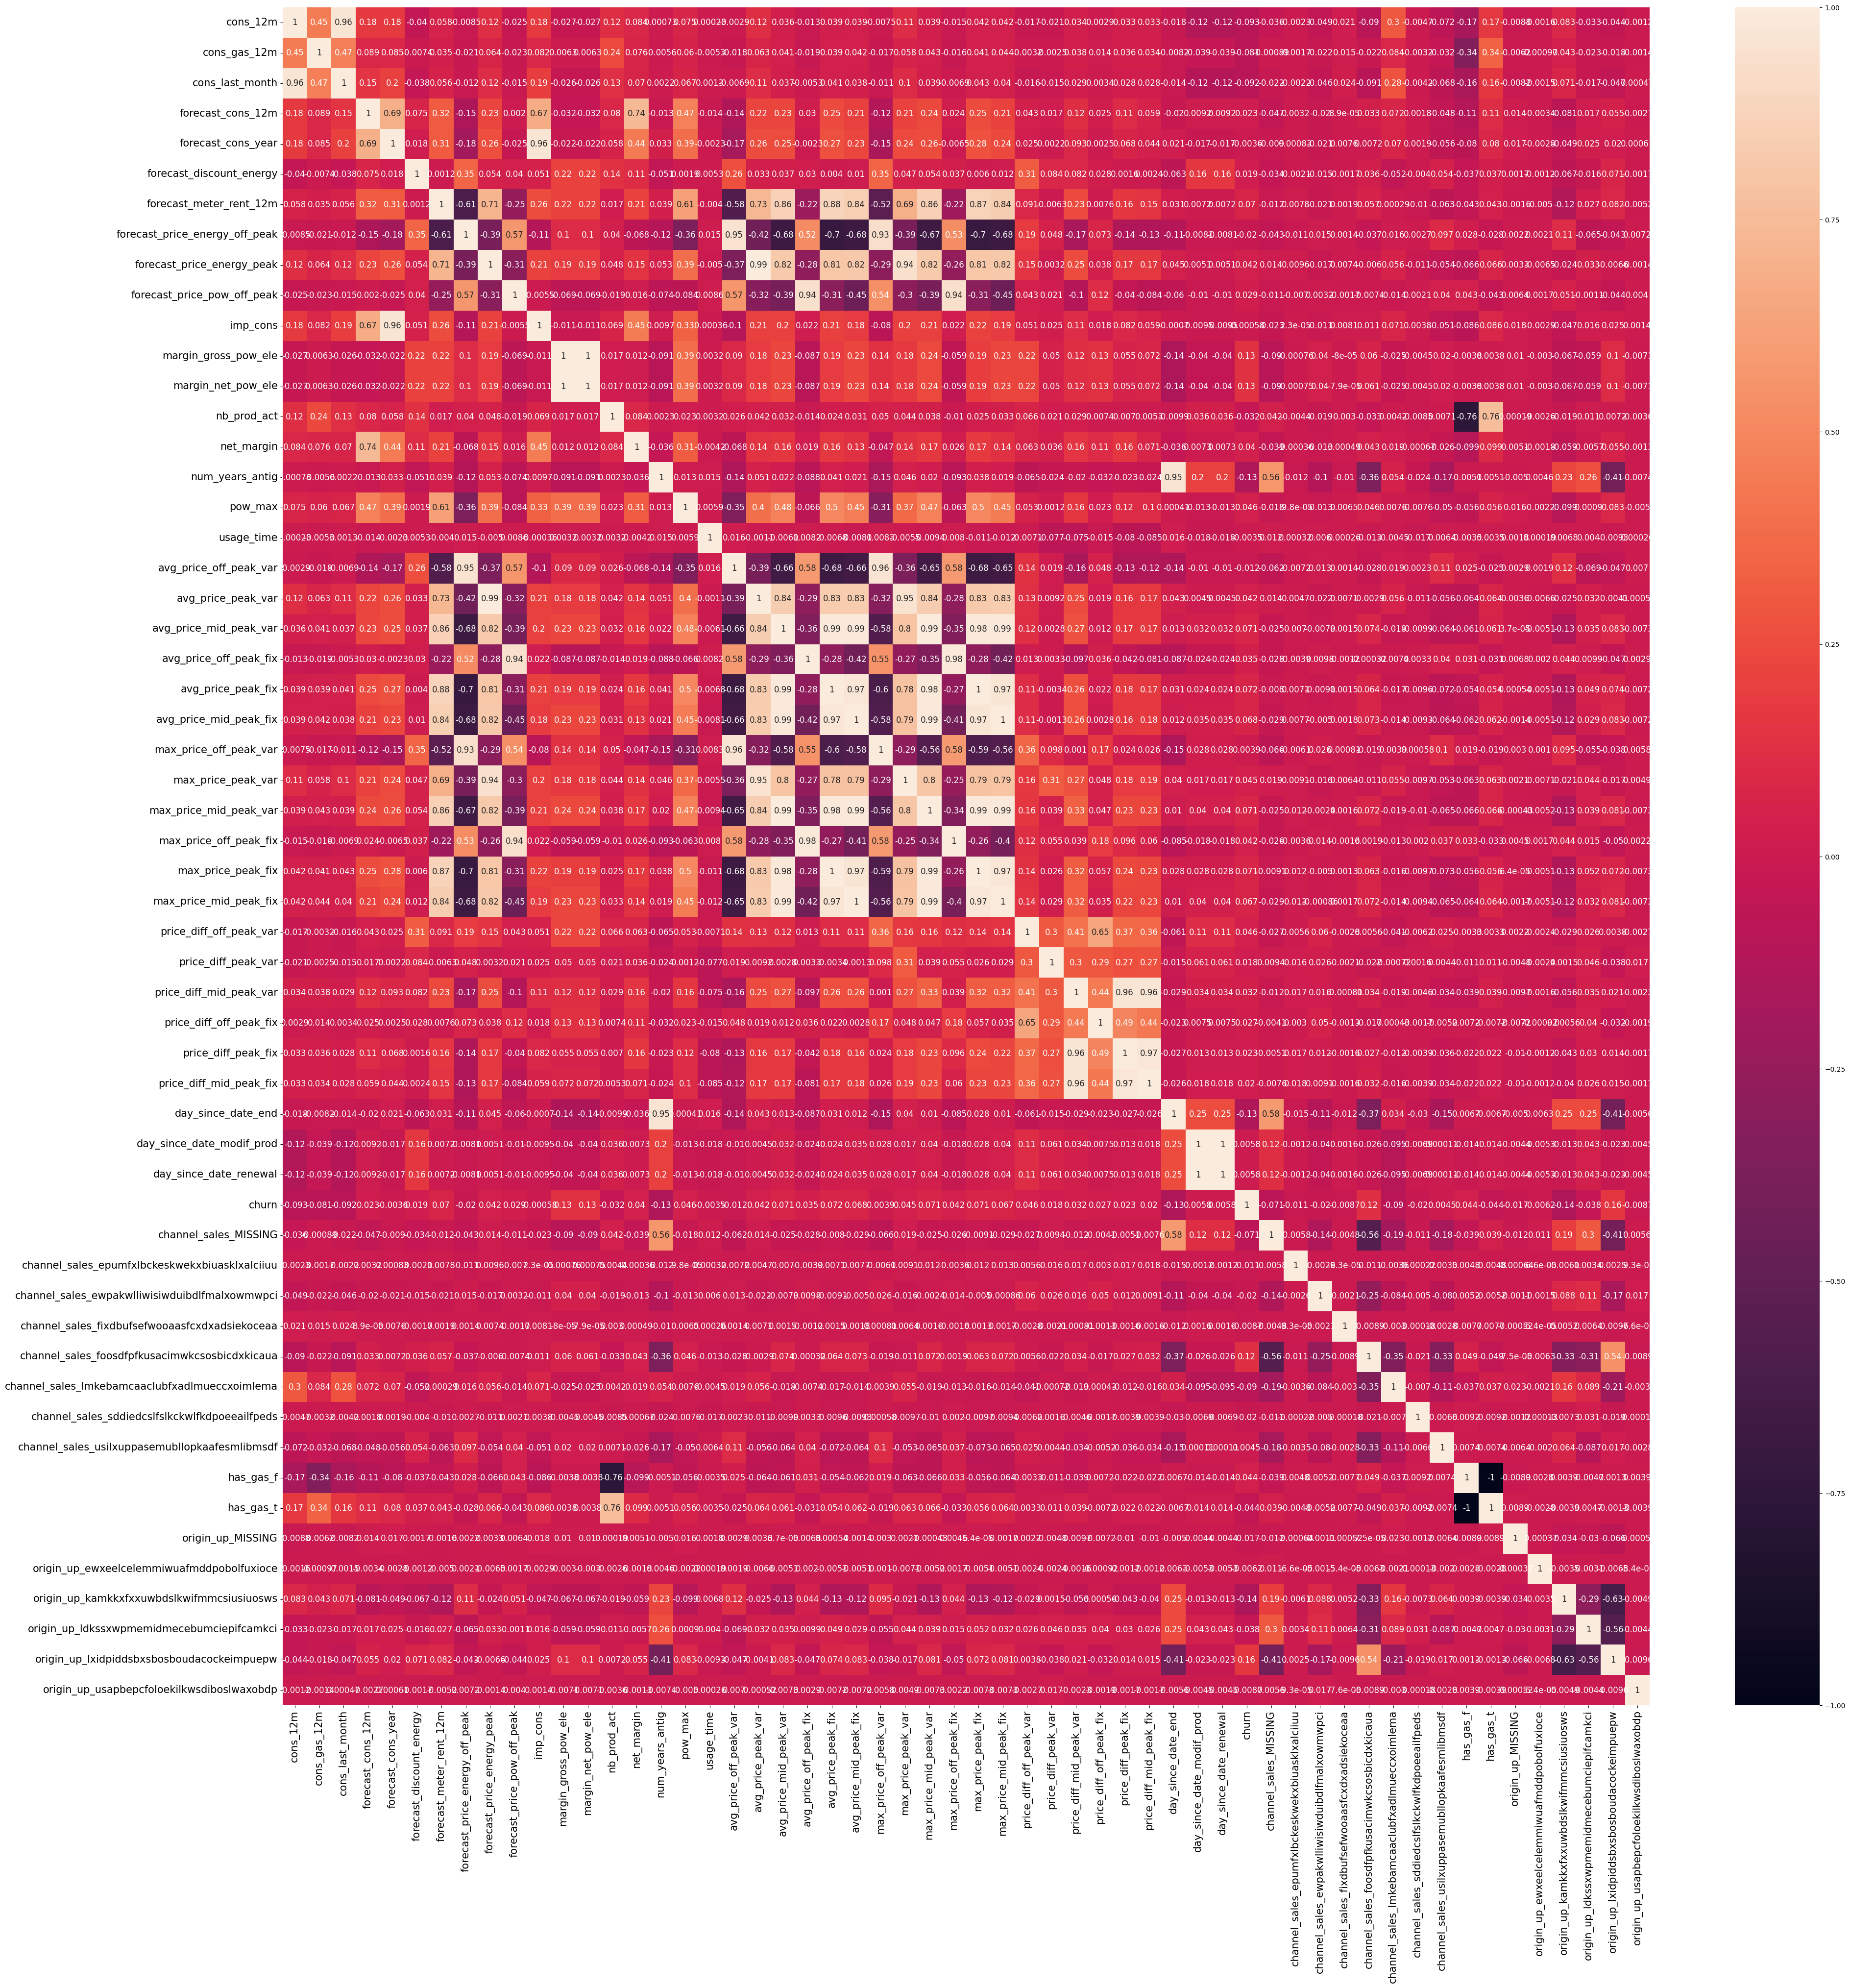

In [ ]:
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
correlation_with_churn = df_clean.corrwith(df_clean['churn'])

# Filter kolom yang memiliki korelasi di luar rentang -0.3 hingga 0.3
filtered_correlation = correlation_with_churn[
    (correlation_with_churn >= 0.03) | (correlation_with_churn <= -0.03)
].index

print(filtered_correlation)

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'pow_max', 'avg_price_off_peak_var', 'avg_price_peak_var',
       'avg_price_mid_peak_var', 'avg_price_off_peak_fix',
       'avg_price_peak_fix', 'avg_price_mid_peak_fix', 'max_price_peak_var',
       'max_price_mid_peak_var', 'max_price_off_peak_fix',
       'max_price_peak_fix', 'max_price_mid_peak_fix',
       'price_diff_off_peak_var', 'price_diff_peak_var',
       'price_diff_mid_peak_var', 'price_diff_off_peak_fix',
       'price_diff_peak_fix', 'price_diff_mid_peak_fix', 'day_since_date_end',
       'churn', 'channel_sales_MISSING',
       'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_sales_ewpakwlliwisiwduibdl

In [ ]:
df_clean_done = df_clean[filtered_correlation]
df_clean_done

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0             0         54946                0               0.00   
1          4660             0                0             189.95   
2           544             0                0              47.96   
3          1584             0                0             240.04   
4          4425             0              526             445.75   
...         ...           ...              ...                ...   
26369     27212        108663             2123             271.17   
26370     39371             0             4011            5806.81   
26371     11924             0             1631            1434.60   
26372      5607             0             1026             613.20   
26373      8030             0             2293             886.43   

       forecast_discount_energy  forecast_meter_rent_12m  \
0                           0.0                     1.78   
1                           0.0                    16.27   
2                           0.0                    38.72   
3                           0.0                    19.83   
4                           0.0                   131.73   
...                         ...                      ...   
26369                       0.0                    14.96   
26370                       0.0                    13.74   
26371                       0.0                    26.84   
26372                       0.0                    16.54   
26373                       0.0                    19.91   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                            0.114481                    0.098142   
1                            0.145711                    0.000000   
2                            0.165794                    0.087899   
3                            0.146694                    0.000000   
4                            0.116900                    0.100015   
...                               ...                         ...   
26369                        0.146348                    0.000000   
26370                        0.143166                    0.000000   
26371                        0.164197                    0.085553   
26372                        0.144963                    0.000000   
26373                        0.165793                    0.088539   

       forecast_price_pow_off_peak  margin_gross_pow_ele  margin_net_pow_ele  \
0                        40.606701                 25.44               25.44   
1                        44.311378                 16.38               16.38   
2                        44.311378                 28.60               28.60   
3                        44.311378                 30.22               30.22   
4                        40.606701                 44.91               44.91   
...                            ...                   ...                 ...   
26369                    46.305378                 26.73               26.73   
26370                    44.311378                 22.95               22.95   
26371                    45.308378                 16.80               16.80   
26372                    44.311378                 26.04               26.04   
26373                    44.311378                  7.76                7.76   

       nb_prod_act  net_margin  num_years_antig  pow_max  \
0                2      678.99                3   43.648   
1                1       18.89                6   13.800   
2                1        6.60                6   13.856   
3                1       25.46                6   13.200   
4                1       47.98                6   19.800   
...            ...         ...              ...      ...   
26369            2       29.98                6   13.200   
26370            1      527.60                4   13.856   
26371            1       91.01                4   13.856   
26372            1       62.92                5   10.392   
26373  

# Model

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean_done.drop(columns=['churn'])
y = df_clean_done['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier(min_samples_split=5,max_depth=15,random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")m
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Random Forest Classifier Performance:
Accuracy: 0.9369

Confusion Matrix:
[[8484  761]
 [ 404 8813]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      9245
           1       0.92      0.96      0.94      9217

    accuracy                           0.94     18462
   macro avg       0.94      0.94      0.94     18462
weighted avg       0.94      0.94      0.94     18462



###Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=10)

# Tampilkan hasil cross-validation
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


###Top Features

In [ ]:
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()